In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('./spaghetti.csv', encoding="windows-1251")
df

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48124,5142333,660820070702005033693,6608,2007/07/02,0.575660,45518841,4551884,22115,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22115,FIDEOS 0 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48125,5142335,660820070618006015969,6608,2007/06/18,0.829954,110824211,11082421,22124,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22124,PLUMAS 3 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48126,5150526,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21818,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21818,MACARRONES 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
48127,5150527,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21814,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21814,SPAGHETTI 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta


In [3]:
user_df= df[['tc', 'art_sp']]

In [6]:
user_df= user_df.rename(columns={'tc':'user_id', 'art_sp':'brand_info'})
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [12]:
def split_brands(brands_name_data):
    return brands_name_data.split(' ')[-1]

In [14]:
user_df['brands_name']=user_df['brand_info'].apply(split_brands)


In [15]:
# user_df['brands_name']= user_df.brand_info.apply(lambda x: x.split(' ')[-1])

In [16]:
user_df

,user_id,brand_info,brands_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [21]:
user_purchases= user_df.groupby("user_id" , as_index=False) \
    .agg({'brands_name':'count'}) \
    .rename(columns={'brands_name':'purchases'}) \
    .query('purchases >= 5')
#отобпали пользователей которые совершили больше или 5 покупок

In [22]:
user_purchases

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [28]:
love_brand_purchases = user_df.groupby(['user_id', 'brands_name'], as_index=False) \
    .agg({'brand_info':'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby("user_id") \
    .head(1) \
    .rename(columns={'brands_name':'love_brand', 'brand_info':'love_brand_purchases'})

love_brand_purchases # любимый бренд каждого пользователя и число покупок для этого бренда

,user_id,love_brand,love_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [29]:
user_unique_brand=user_df.groupby('user_id', as_index=False) \
    .agg({"brands_name": pd.Series.nunique}) \
    .rename(columns={'brands_name':'unique_brand'})

user_unique_brand #сколько у каждого пользователя уникальных брендов

,user_id,unique_brand
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [31]:
loyalty_df=user_purchases.merge(user_unique_brand, on="user_id") \
    .merge(love_brand_purchases, on="user_id")
loyalty_df

,user_id,purchases,unique_brand,love_brand,love_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [33]:
loyal_users=loyalty_df[loyalty_df.unique_brand==1]
loyal_users #Пользователи покупавшие тлько 1 бренд

,user_id,purchases,unique_brand,love_brand,love_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [38]:
loyalty_df['loyal_score']= round(loyalty_df.love_brand_purchases / loyalty_df.purchases * 100,2) # добавили колонку лояльности
loyalty_df 

,user_id,purchases,unique_brand,love_brand,love_brand_purchases,loyal_score
0,1031,6,2,Store_Brand,5,83.33
1,4241,5,2,Brand_4,3,60.00
2,25971,7,2,Store_Brand,5,71.43
3,40911,27,5,Brand_4,19,70.37
4,45181,5,4,Store_Brand,2,40.00
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,100.00
3379,1408783189,10,2,Store_Brand,8,80.00
3380,1408783379,6,2,Brand_1,4,66.67
3381,1408798879,8,3,Store_Brand,4,50.00


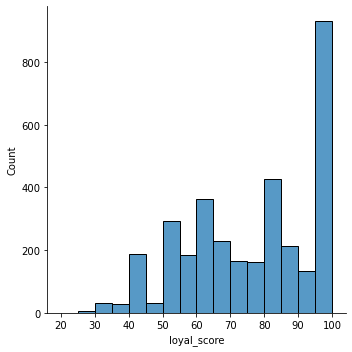

In [44]:
ax = sns.displot(loyalty_df.loyal_score, kde=False)

In [48]:
brands_loyal=loyalty_df.groupby("love_brand", as_index=False) \
    .agg({'loyal_score':'median', 'user_id':'count'}) \
    .sort_values(['loyal_score'], ascending=False)
brands_loyal

,love_brand,loyal_score,user_id
3,Brand_4,81.82,2041
6,Store_Brand,75.00,715
0,Brand_1,67.95,410
1,Brand_2,60.00,88
4,Brand_5,60.00,5
2,Brand_3,50.00,115
5,Brand_7,44.44,9


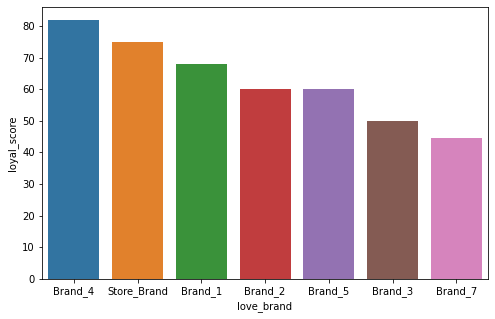

In [51]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="love_brand", y="loyal_score", data=brands_loyal)

In [ ]:
#лояльность покупателей к бренду

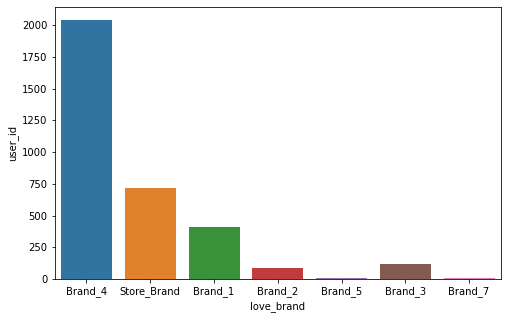

In [52]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="love_brand", y="user_id", data=brands_loyal)

In [ ]:
#график лояльных покупателей к определенному бренду
#так большинсво покупателей более лояльны к брену №4

In [54]:
loyalty_df.sort_values(['loyal_score'], ascending=False)

,user_id,purchases,unique_brand,love_brand,love_brand_purchases,loyal_score
2143,54915411,10,1,Brand_4,10,100.00
1662,27647721,6,1,Brand_4,6,100.00
1655,27415431,8,1,Brand_4,8,100.00
2880,94697021,9,1,Brand_4,9,100.00
1657,27472311,7,1,Brand_4,7,100.00
...,...,...,...,...,...,...
453,2406921,7,5,Brand_2,2,28.57
577,3616201,7,4,Brand_1,2,28.57
676,5046282,7,4,Brand_1,2,28.57
2959,100947471,7,4,Brand_2,2,28.57


In [62]:
loyalty_80_df=loyalty_df[loyalty_df.loyal_score >= 20.00]
loyalty_80_df

,user_id,purchases,unique_brand,love_brand,love_brand_purchases,loyal_score
13,86281,14,1,Brand_4,14,100.0
18,94961,6,1,Brand_4,6,100.0
29,132061,9,1,Brand_4,9,100.0
30,134281,6,1,Brand_4,6,100.0
35,157311,12,1,Brand_4,12,100.0
...,...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9,100.0
3374,1010247239,5,1,Brand_4,5,100.0
3376,1010274559,5,1,Brand_4,5,100.0
3377,1110091379,5,1,Brand_1,5,100.0
